In [14]:
from androguard.misc import AnalyzeAPK
import os
import pandas as pd
from dotenv import dotenv_values

In [16]:
keys = dotenv_values('.ben')

API_KEY = keys['ANDROZOO_API_KEY']

In [7]:
# https://apkcombo.com/colornote/com.socialnmobile.dictapps.notepad.color.note/download/apk
test_apk = os.path.abspath('./APKs/color_note.apk')

apk,dex,analysis = AnalyzeAPK(test_apk)

Requested API level 31 is larger than maximum we have, returning API level 28 instead.


In [159]:
import seaborn as sns
import matplotlib.pyplot as plt
from math import floor, log10
from collections import Counter

benford = pd.DataFrame.from_dict({
        1: .301,
        2: .176,
        3: .125,
        4: .097,
        5: .079,
        6: .067,
        7: .058,
        8: .051,
        9: .046,
    }, orient='index', columns=['benford'])

def get_first_digit(i: int):
    if i == 0:
        return 0
    return floor(i / (10 ** floor(log10(i))))

def graph(data: list[int]):
    benford_copy = benford.copy()
    df = pd.DataFrame.from_dict(Counter(data), orient='index', columns=['custom']).drop(index=0)
    total = df['custom'].sum()
    benford_copy['benford'] *= total

    fig, ax = plt.subplots()
    
    sns.scatterplot(df, ax=ax, palette=['blue'])
    sns.lineplot(benford_copy, ax=ax, palette=['red'])


## Sum of lengths of constant strings

[0, 1, 3, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 1, 5, 6, 4, 4, 8, 1, 7, 1, 4, 3, 8, 2, 5, 2, 1, 2, 4, 7, 5, 2, 1, 3, 3, 2, 0, 1, 0, 7, 4, 4, 8, 4, 1, 1, 1, 0, 0, 0, 7, 7, 6, 1, 6, 1, 1, 1, 1, 2, 2, 2, 4, 1, 2, 1, 9, 9, 1, 2, 1, 1, 6, 1, 2, 8, 1, 8, 2, 1, 1, 7, 1, 2, 1, 1, 1, 1, 3, 3, 9, 2, 6, 6, 1, 1, 5, 1, 1, 2, 6, 4, 2, 3, 4, 2, 7, 1, 1, 1, 1, 7, 1, 3, 6, 2, 2, 1, 4, 3, 3, 2, 1, 2, 5, 3, 5, 1, 1, 2, 2, 1, 1, 1, 4, 1, 4, 3, 4, 2, 1, 5, 8, 4, 6, 8, 7, 9, 1, 1, 1, 9, 1, 2, 2, 3, 1, 2, 6, 7, 1, 6, 5, 1, 1, 1, 1, 1, 7, 3, 7, 1, 3, 3, 2, 4, 4, 1, 1, 4, 2, 2, 8, 7, 1, 3, 3, 3, 3, 7, 9, 3, 9, 2, 5, 3, 6, 5, 5, 7, 1, 3, 6, 1, 8, 6, 2, 1, 5, 1, 2, 6, 7, 7, 8, 4, 4, 4, 4, 4, 4, 3, 4, 3, 3, 5, 2, 8, 7, 1, 3, 2, 2, 2, 3, 4, 5, 5, 5, 5, 5, 5, 6, 9, 4, 4, 6, 1, 7, 6, 8, 6, 1, 1, 7, 8, 3, 1, 3, 1, 1, 8, 5, 1, 1, 1, 1, 1, 1, 3, 8, 4, 4, 2, 5, 1, 4, 2, 2, 1, 2, 2, 6, 1, 3, 5, 7, 2, 1, 8, 2, 1, 1, 6, 4, 1, 7, 4, 3, 2, 4, 1, 1, 2, 6, 8, 1, 2, 1, 7, 2, 2, 2, 5, 4, 3, 2, 2, 3, 1, 3, 3, 3, 3, 2, 3, 1, 1, 5, 4, 6, 

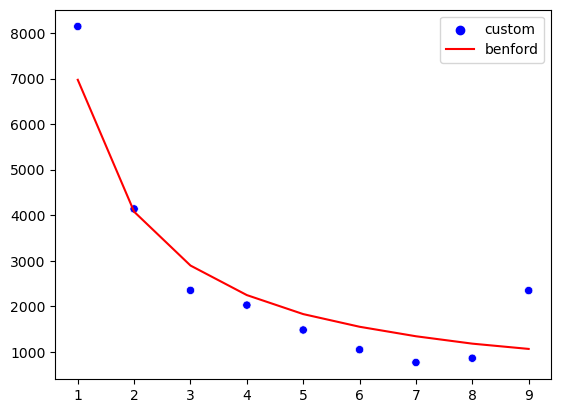

In [160]:
def first_digit_len(x):
    l = len(x)
    return get_first_digit(l)

strings = dex[0].get_strings()

strings = list(map(str.strip, strings))

data = list(map(first_digit_len, strings))

print(data)
graph(data)

## Sum of Decimal encoded characters of constant strings

[0, 5, 4, 3, 4, 3, 3, 5, 1, 1, 0, 0, 1, 1, 4, 5, 4, 3, 7, 1, 7, 1, 3, 3, 8, 1, 4, 1, 1, 2, 3, 5, 4, 1, 9, 2, 2, 1, 0, 4, 0, 6, 3, 3, 7, 3, 7, 7, 1, 0, 0, 0, 5, 7, 5, 3, 3, 9, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 9, 9, 9, 2, 1, 9, 5, 1, 1, 7, 1, 7, 2, 1, 1, 6, 1, 9, 3, 3, 3, 4, 2, 3, 8, 2, 5, 4, 1, 1, 4, 4, 4, 2, 4, 1, 1, 2, 1, 1, 3, 4, 4, 4, 5, 5, 6, 1, 2, 1, 1, 6, 1, 1, 1, 1, 6, 1, 3, 2, 2, 1, 1, 1, 1, 8, 1, 1, 2, 1, 3, 1, 2, 2, 1, 4, 7, 2, 5, 5, 4, 6, 7, 7, 1, 7, 1, 2, 1, 2, 1, 2, 5, 6, 1, 6, 3, 8, 9, 9, 9, 1, 6, 3, 6, 1, 3, 3, 2, 4, 4, 1, 1, 4, 2, 2, 7, 6, 1, 3, 3, 2, 2, 6, 9, 3, 8, 2, 5, 3, 5, 5, 5, 7, 1, 3, 6, 1, 8, 6, 2, 1, 4, 1, 2, 5, 7, 7, 8, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 1, 7, 6, 1, 3, 2, 2, 1, 2, 4, 5, 5, 4, 5, 5, 5, 6, 9, 3, 3, 6, 9, 7, 6, 7, 5, 9, 9, 7, 7, 3, 1, 2, 1, 1, 7, 5, 1, 1, 1, 1, 1, 1, 3, 8, 4, 4, 1, 4, 1, 3, 1, 2, 1, 2, 2, 6, 1, 2, 4, 7, 2, 1, 7, 2, 1, 1, 5, 4, 1, 7, 3, 3, 2, 4, 1, 1, 2, 5, 7, 9, 1, 1, 6, 2, 2, 2, 5, 4, 3, 2, 2, 2, 1, 3, 3, 3, 2, 2, 2, 1, 1, 5, 3, 6, 

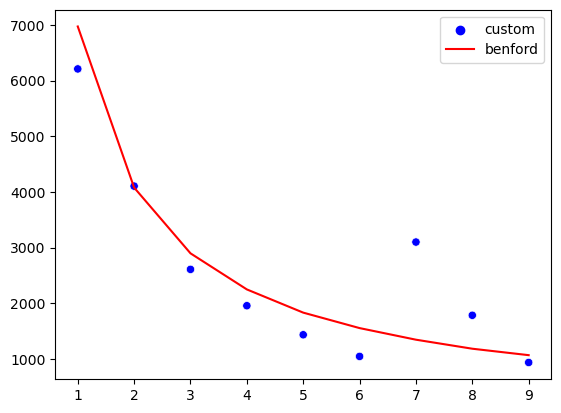

In [161]:
from collections import Counter

def first_digit_sum_of_chars(s):
    s = sum(ord(c) for c in s)
    return get_first_digit(s)

strings = dex[0].get_strings()

strings = list(map(str.strip, strings))

data = list(map(first_digit_sum_of_chars, strings))

print(data)
graph(data)